In [1]:
from likelihood_accretion import *
from detection import *
import matplotlib.pyplot as plt
import numpy as np
import time
from iminuit import Minuit
from scipy.stats import chi2   
import os.path
import pandas as pd 

#plt.style.use('style.mplstyle')

In [2]:
#Parameters allowed space
#Cooling
Tci, Tcf = 1, 10
tau_ci, tau_cf = 1, 40
Rci, Rcf = 1, 100
tau_i, tau_f = 1, 1.4
#Accretion
Tai, Taf = 0.1, 7
tau_ai, tau_af = 0.3, 3.5
Mai, Maf = 0, 0.6
#Off-set times
toff_K_i,toff_K_f =0,6
toff_I_i,toff_I_f =0,6
toff_B_i,toff_B_f =0,6
#nubar_e survival probability 
Pee_i,Pee_f=0,1


In [3]:

start_time = time.time()

Likelihood_c_a_Pee.errordef = Minuit.LEAST_SQUARES
x0_c_a_Pee=np.array([5.37,15.,11.3,1.2,  1.91,0.58,0.8,  0.0,0.47,0.0,   0.5])    # local minimum?
#x0_c_a_Pee=np.array([2.45,15.,21.1,1.2,  3.1,3.5,0.6,  0.0,0.0,0.0,   1.])       # true minimum?
m_c_a_Pee = Minuit(Likelihood_c_a_Pee, x0_c_a_Pee)
m_c_a_Pee.limits = [(Tci, Tcf), (tau_ci, tau_cf), (Rci, Rcf),(tau_i, tau_f), (Tai, Taf), (tau_ai, tau_af), (Mai, Maf),(toff_K_i,toff_K_f),(toff_I_i,toff_I_f),(toff_B_i,toff_B_f),(Pee_i, Pee_f)]
m_c_a_Pee.fixed["x3"] = True
m_c_a_Pee.fixed["x1"] = True
print(np.array(m_c_a_Pee.values))

m_c_a_Pee.migrad()
m_c_a_Pee_BF=np.array(m_c_a_Pee.values)
m_c_a_Pee_BFLH=m_c_a_Pee.fval
print(m_c_a_Pee_BF,m_c_a_Pee_BFLH)



[ 5.37 15.   11.3   1.2   1.91  0.58  0.6   0.    0.47  0.    0.5 ]


/home/holanda/Dropbox/pesquisa/github_programas/SN1987A-data-analysis-pub/SN1987A-2023analysis/cooling+accretion/detection.py:47: RuntimeWarning: invalid value encountered in sqrt
  p_pos = np.where(E_pos <= m_pos, 0., np.sqrt((E_pos**2)-(m_pos**2))) #positron momentum [MeV]


[4.56663117e+00 1.50000000e+01 9.98476482e+00 1.20000000e+00
 1.85428876e+00 6.71901387e-01 6.00000000e-01 2.52172485e-12
 8.24709267e-01 7.80035010e-08 9.99996658e-01] 250.56672822212587


[4.56663117e+00 1.50000000e+01 9.98476482e+00 1.20000000e+00
 1.85428876e+00 6.71901387e-01 6.00000000e-01 2.52172485e-12
 8.24709267e-01 7.80035010e-08 9.99996658e-01]


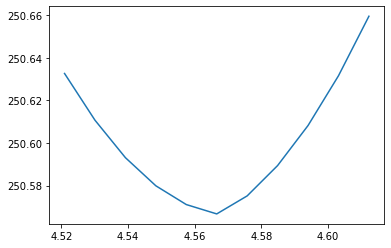

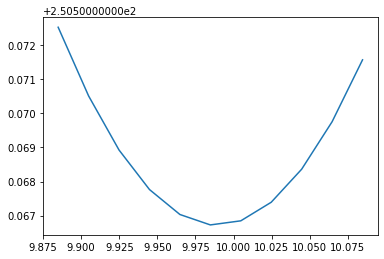

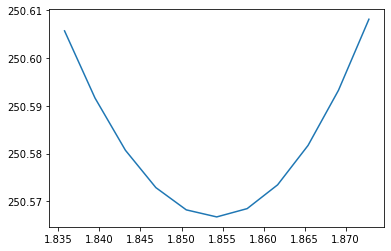

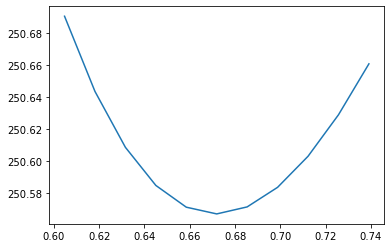

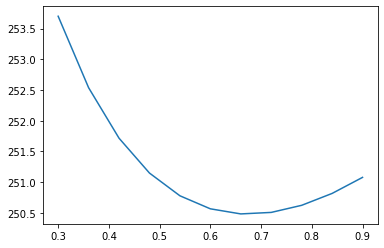

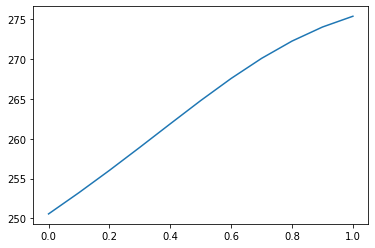

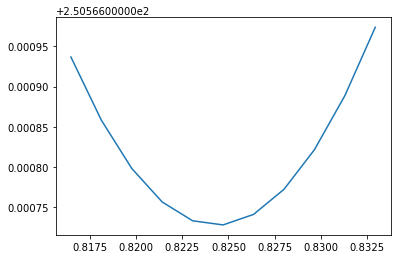

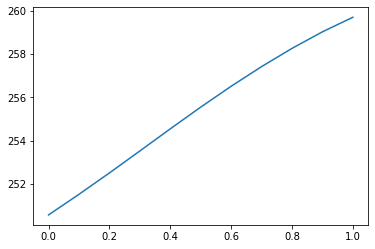

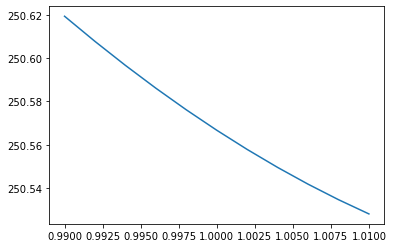

In [4]:
#testing if is a local minimum:

x0_c_a_Pee = m_c_a_Pee_BF.copy()
print(x0_c_a_Pee)

xxtmp=[]
yytmp=[]


for i in range(0,11):
#for i in range(6,7):
    if(i != 1) and (i!=3):
        x0tmp=x0_c_a_Pee.copy()
        xtmp=[]
        ytmp=[]
        for k in range(0,11):
            x0tmp[i]=(0.99+k/500)*x0_c_a_Pee[i]
            if(i == 5):x0tmp[i]=(0.9+k/50)*x0_c_a_Pee[i]
            if(i == 6):x0tmp[i]=(0.5+k/10)*x0_c_a_Pee[i]
            if(i == 7):x0tmp[i]=k/10 #(0.5+k/10)*x0_c_a_Pee[i]
            if(i == 9):x0tmp[i]=k/10 #(0.5+k/10)*x0_c_a_Pee[i]
            lkh=Likelihood_c_a_Pee(x0tmp)
            xtmp.append(x0tmp[i])
            ytmp.append(lkh)
#            print(k,x0tmp[i],lkh)
        xxtmp.append(xtmp)
        yytmp.append(ytmp)
        
for i in range(len(xxtmp)):
    plt.plot(xxtmp[i],yytmp[i])
    plt.show()
